## Step 3. Exploratory analysis:
* univariate, paired distribution
* feature correlations
* missing data visualization

In [95]:
import pandas as pd
import numpy as np
# self-written functions:
import sys
sys.path.append("funcs/")
import data_visualizer as vis
import data_cleaner as dc
from importlib import reload
reload(vis)

<module 'data_visualizer' from 'funcs/data_visualizer.py'>

In [90]:
df = pd.read_parquet('clean_data/ahp.parquet.gzip')
df.head()

dt_sold   yr_sold   mo_sold  yr_built  yr_remodel  bldg_class  bldg_type  \
0 2010-03-25  1.694126 -1.173800  0.141222    0.988023    0.069174          0   
1 2009-04-10  0.932085 -0.808958  0.804174    0.607295    0.069174          0   
2 2010-01-15  1.694126 -1.903484 -0.621174    1.083204   -0.864388          0   
3 2010-04-19  1.694126 -0.808958  1.135650    1.083204    0.069174          0   
4 2010-03-22  1.694126 -1.173800 -2.377998    0.416932   -0.164217          0   

   house_style  zoning  neighborhd  ...  roof_matl  roof_style   op_area  \
0            5       5          22  ...          1           1 -0.054312   
1            5       5          23  ...          1           1  0.394983   
2            2       5          15  ...          1           1  0.065500   
3            5       5          26  ...          1           1 -0.713278   
4            0       5          23  ...          1           1  0.170336   

    ep_area   wd_area  sale_price  yr_dt_sold  mo_dt_sold  day_dt_sold  \
0 -0.376746 -0.730006   -0.645503    1.694126   -1.173800     1.334822   
1 -0.376746 -0.730006         NaN    0.932085   -0.808958    -0.541956   
2 -0.376746 -0.730006   -0.916814    1.694126   -1.903484     0.083636   
3 -0.376746  0.047715   -0.096571    1.694126   -0.808958     0.584111   
4 -0.376746 -0.730006   -0.544550    1.694126   -1.173800     0.959466   

   wday_dt_sold  
0     -0.021917  
1      0.488143  
2      0.488143  
3     -1.552095  
4     -1.552095  

[5 rows x 60 columns]

In [91]:
visualizer = vis.Visualizer(df, key_feature='gar_fin', na_pattern=False)   
# Visualizer Class can make below plots

Visualizer class with the following plotting options:
1. Univariate distributions using `vis.univariate_dashboard(df)`: True
2. Bivariate distributions using `vis.bivariate_dashboard(df, key_feature)`: True
3. Correlation plots for continuous variables using `vis.correlation(df.corr())`: True
4. Missing data pattern plots using `vis.na_plots(df)`: False


### Data Visualization:
class applied:
* vis.Visualizer(df, key_feature=None, corr=True, univariate=True, bivariate=True, na_pattern=True)

function applied: 
* vis.univariate_dashboard(df, fontsize=None, rotation=0)
* vis.bivariate_dashboard(df, key_feature, key_dtype=None, stacked=False, fontsize=None)
* vis.correlation(corr, hc_order=True, save_path=None, **kwargs)

---------------------------
Univariate distributions: 
Auto font size: 20


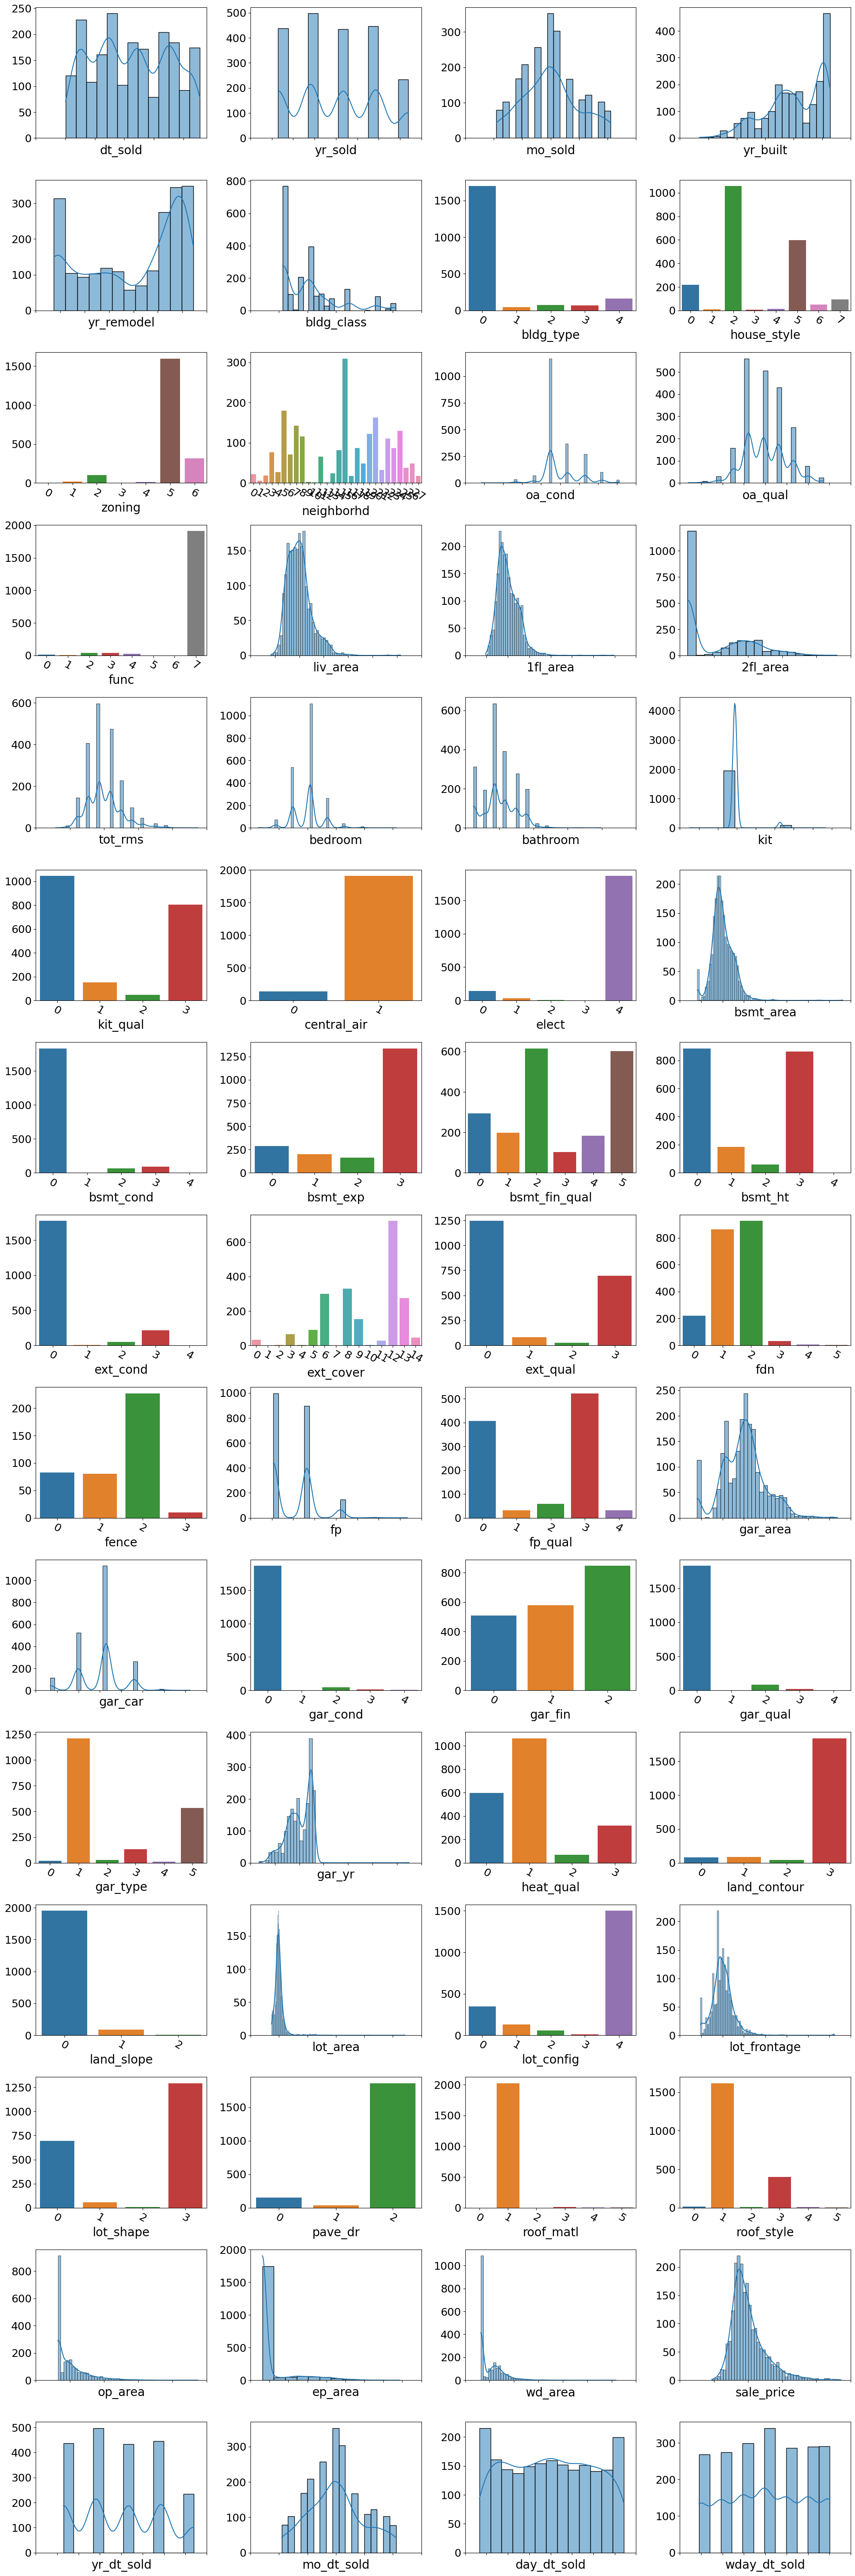

---------------------------
Bivariate distributions using key_feature gar_fin
key_feature gar_fin is treated as categorical variable due to dtype=Int64
Auto font size: 20


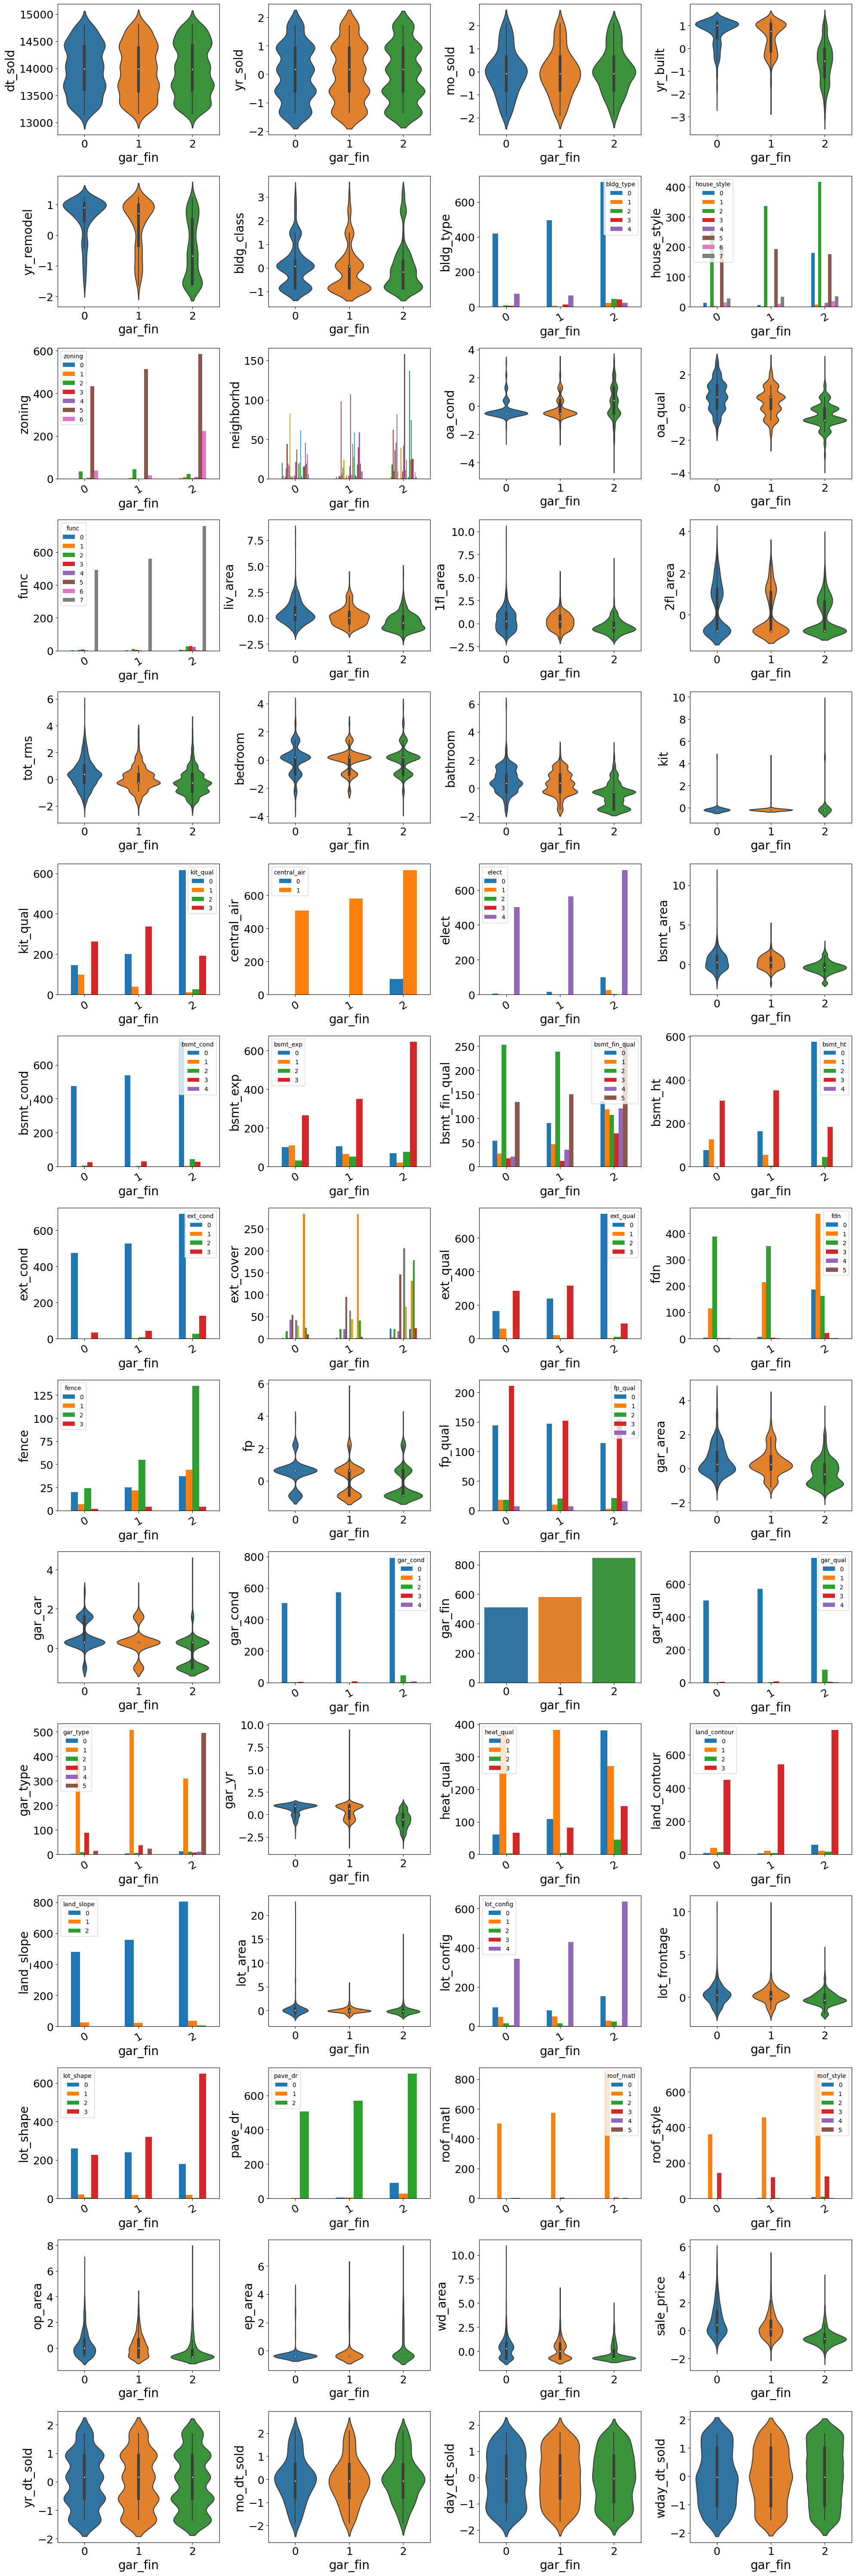

---------------------------
Correlation plots using all cols with dtype='float'


funcs/data_visualizer.py:202: UserWarning: There are features with absolute correlation==1:
funcs/data_visualizer.py:204: UserWarning: yr_sold & yr_dt_sold
funcs/data_visualizer.py:204: UserWarning: mo_sold & mo_dt_sold


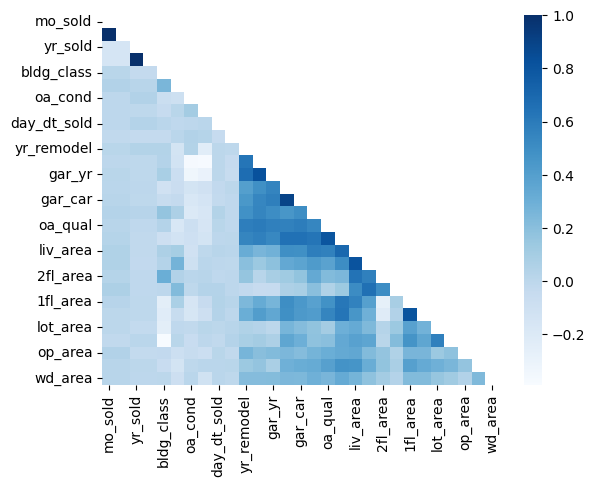

In [96]:
visualizer.auto_plots() # grouped by categorical feature
# should rm features according to vis.check_corr()

key_feature yr_built is treated as continuous variable due to dtype='float'
Auto font size: 20


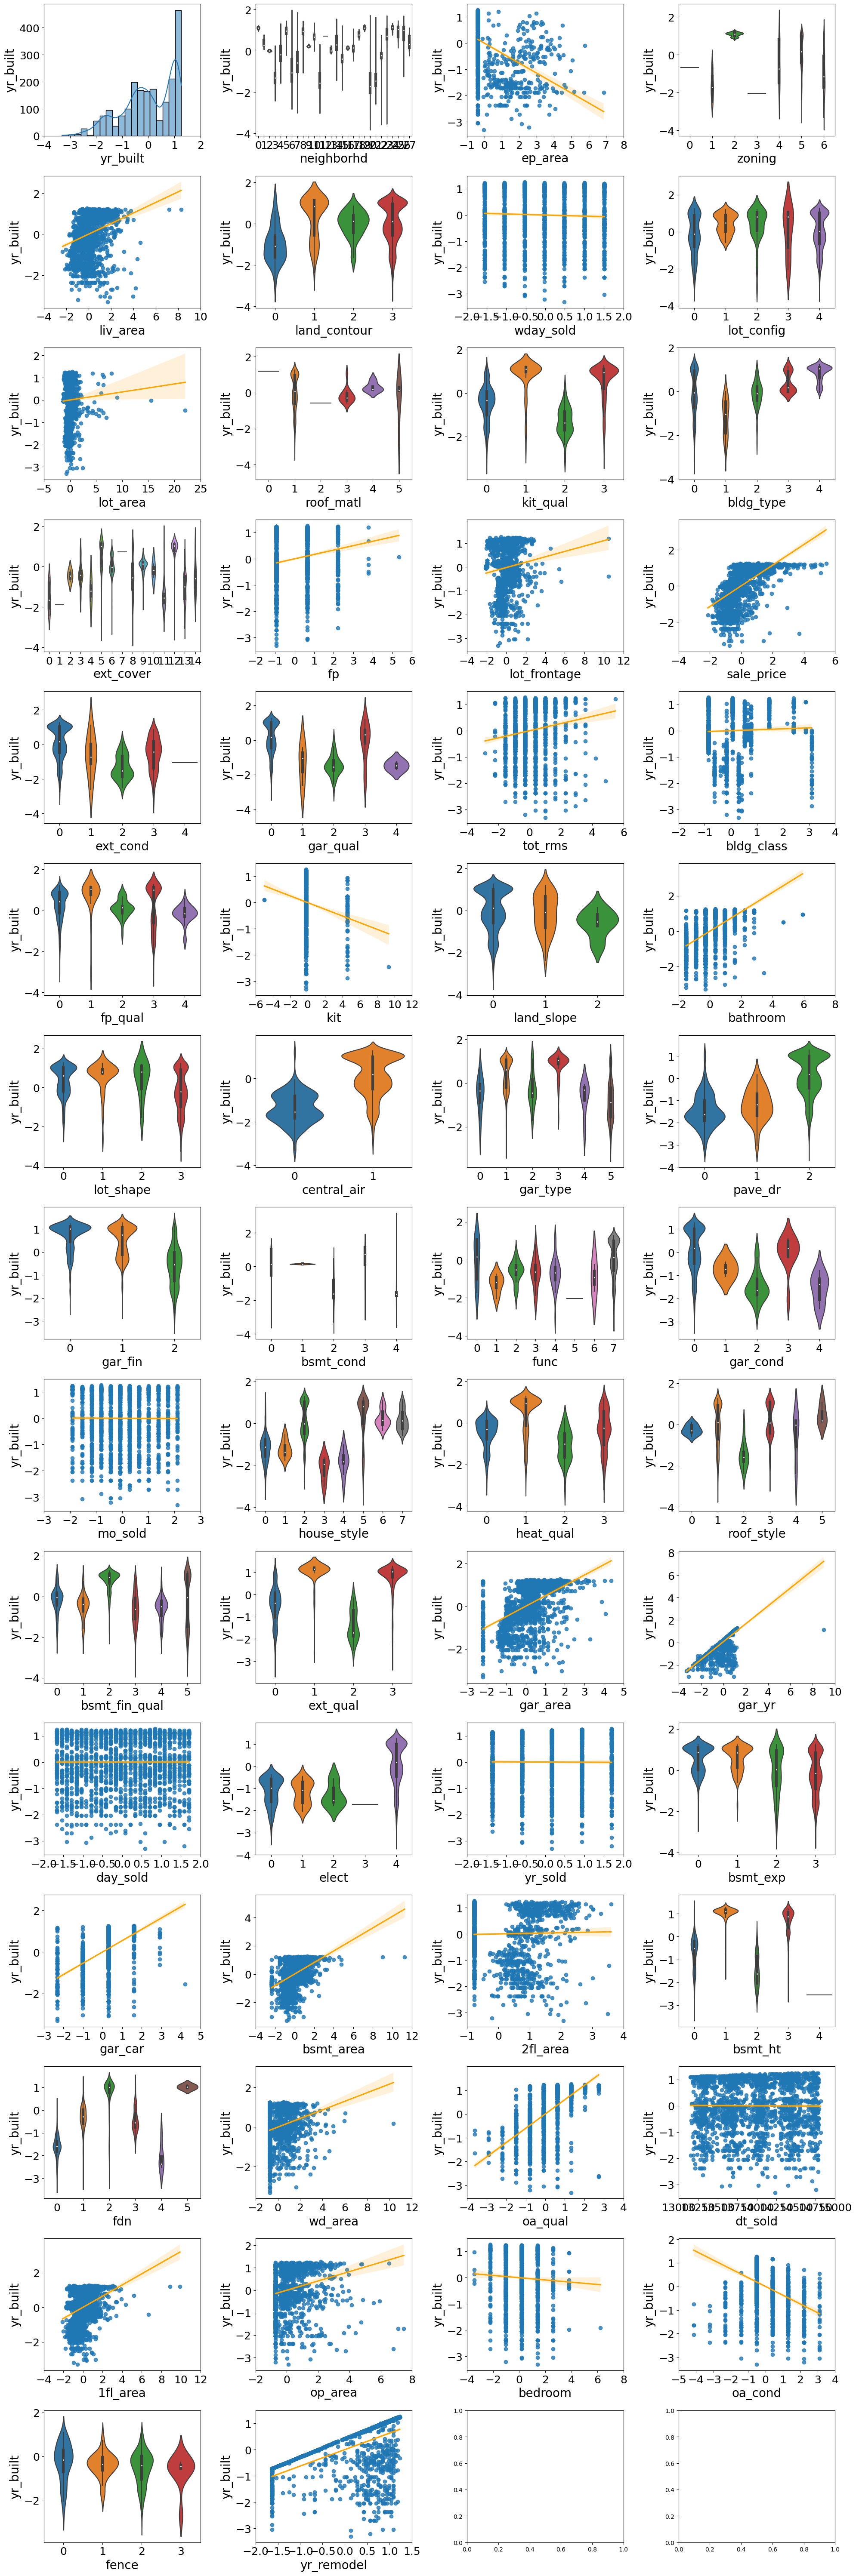

In [52]:
### Other examples:
## bivariate dashboard grouped by continuous outcome:
bi2 = vis.bivariate_dashboard(df, key_feature='yr_built')

## stacked plot:
# bi1 = vis.bivariate_dashboard(df, key_feature='gar_fin', stacked=True)

### Imputation & Missing data pattern
function applied: 
* vis.na_plots(df)

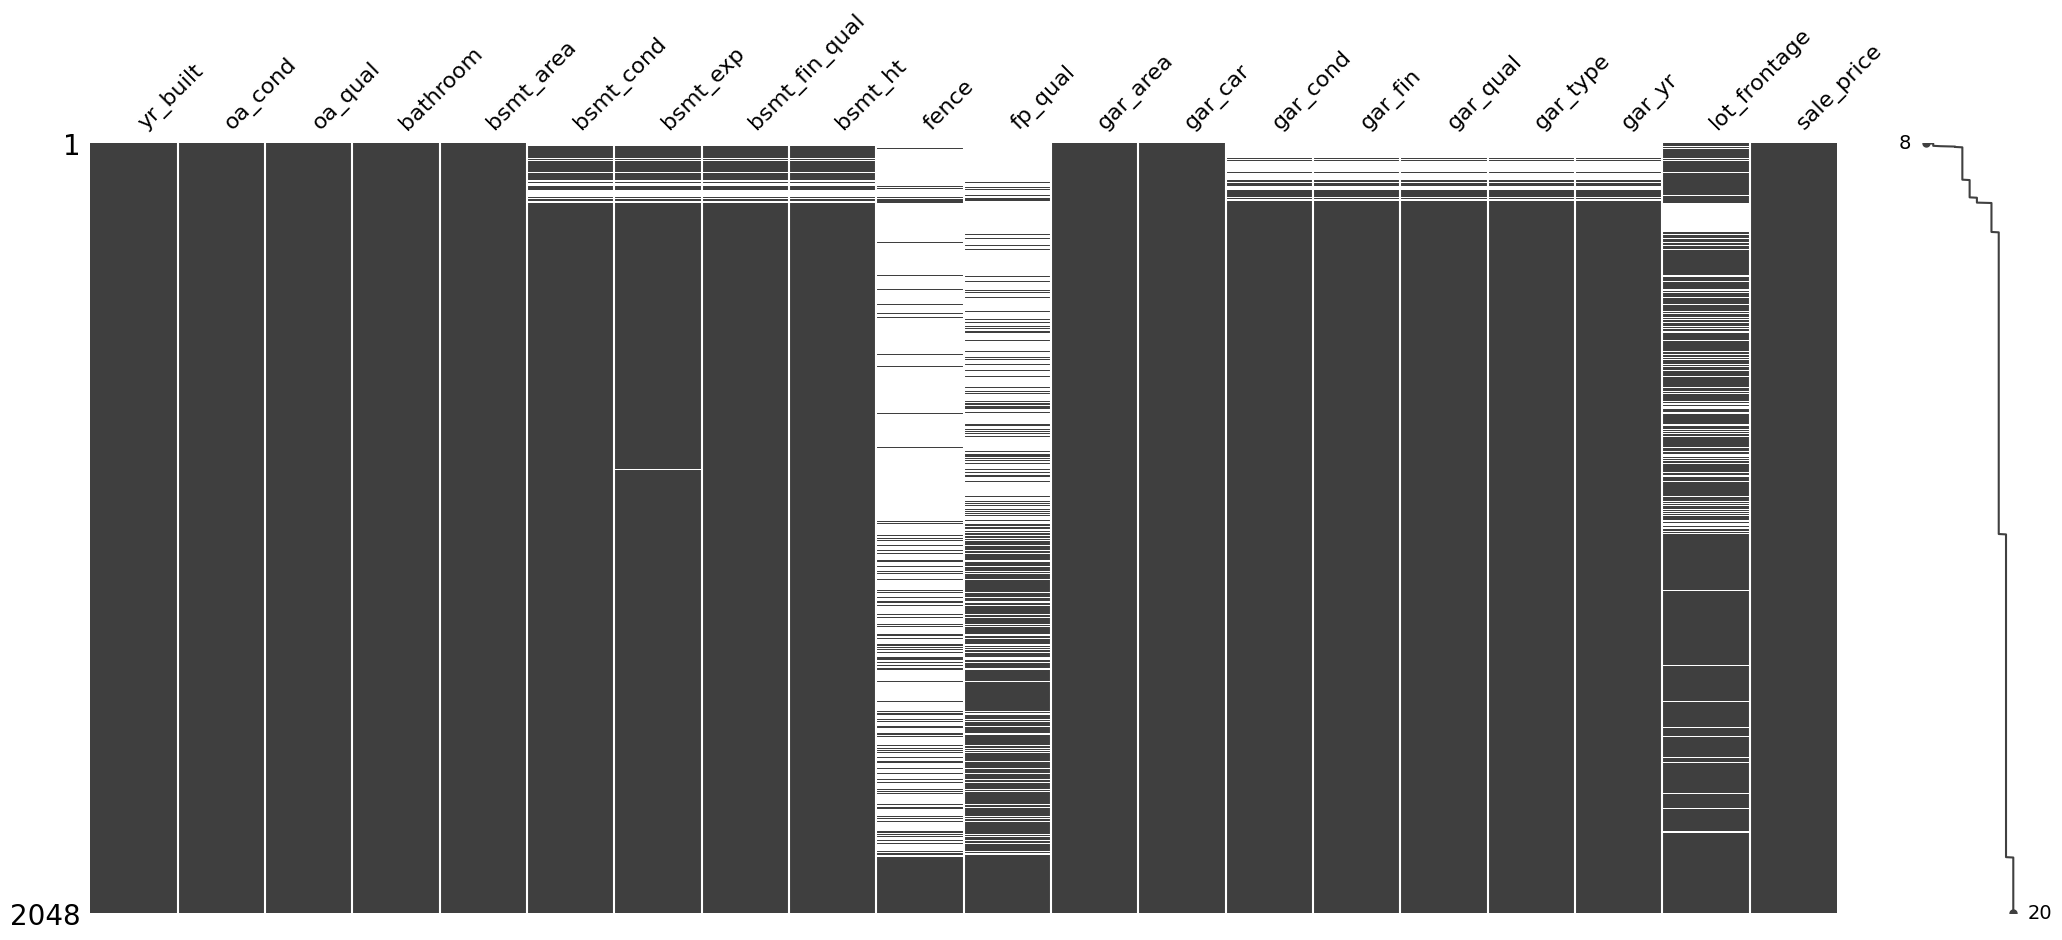

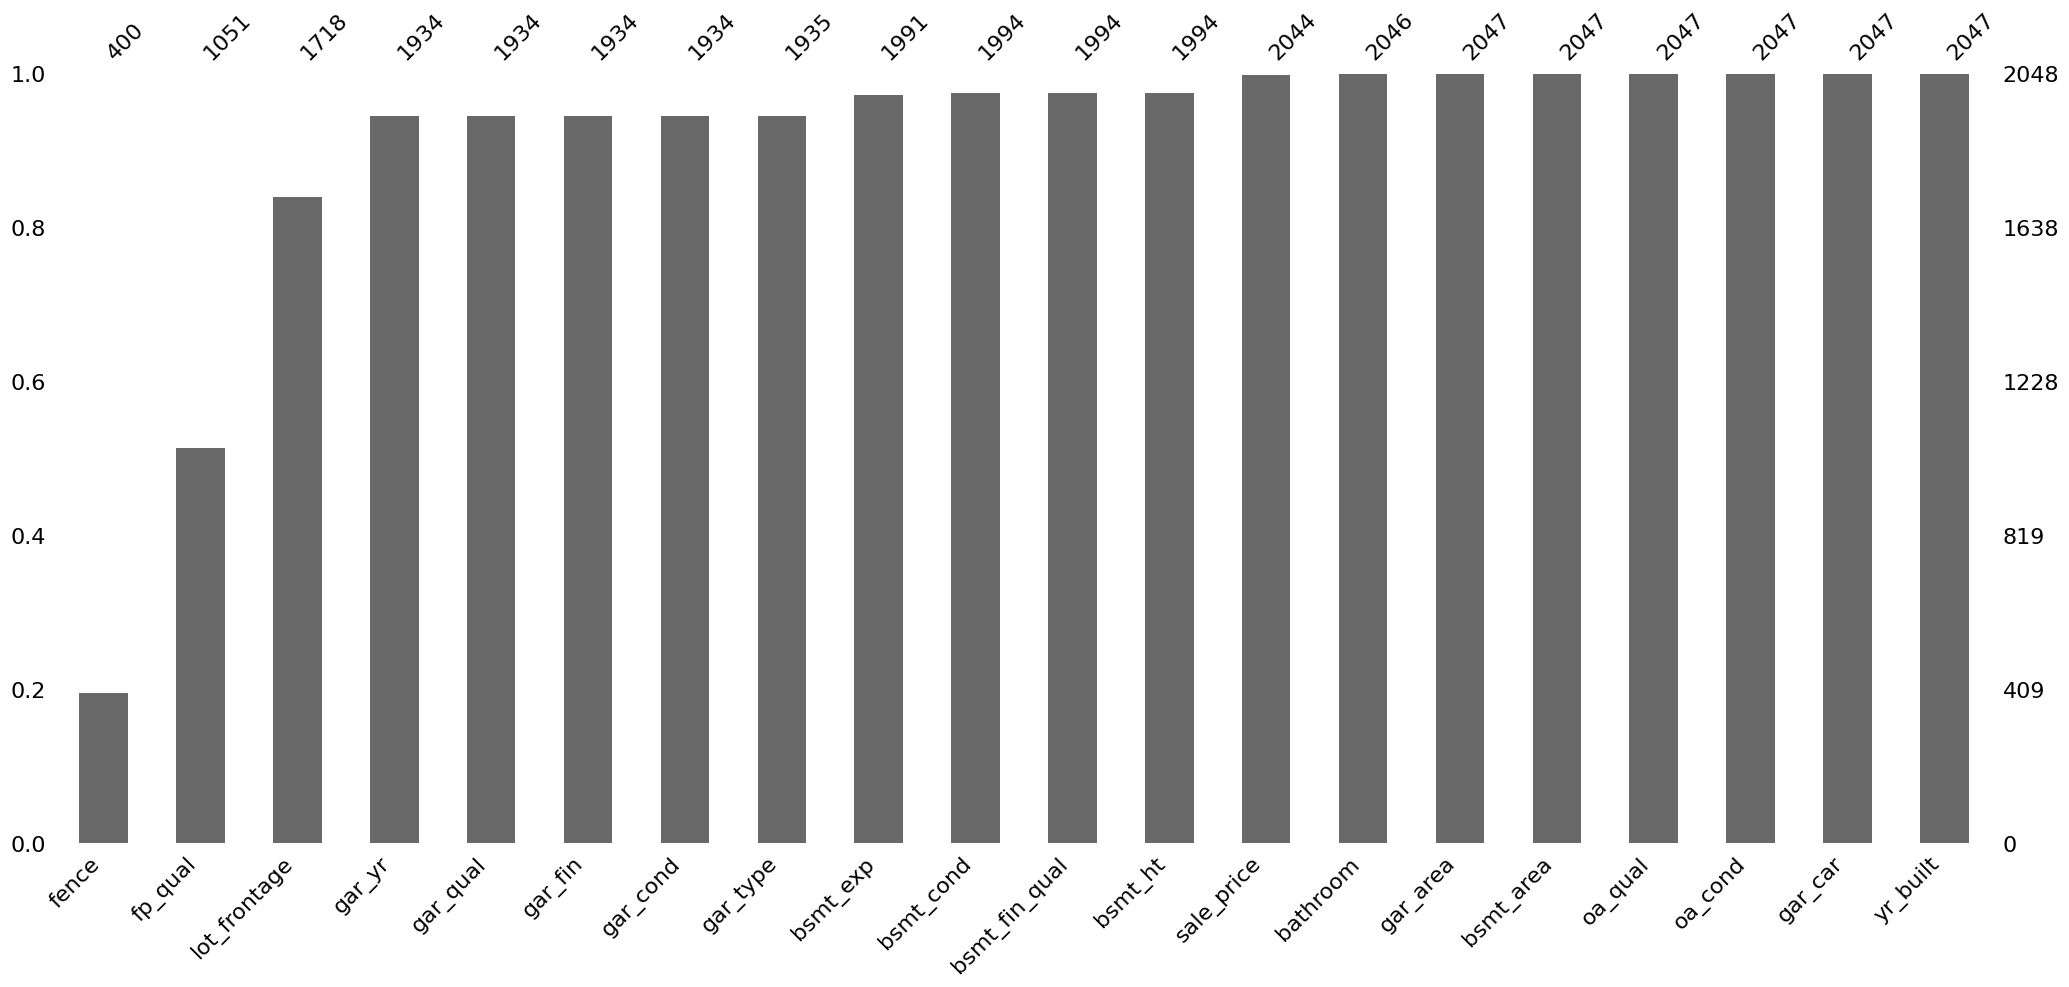

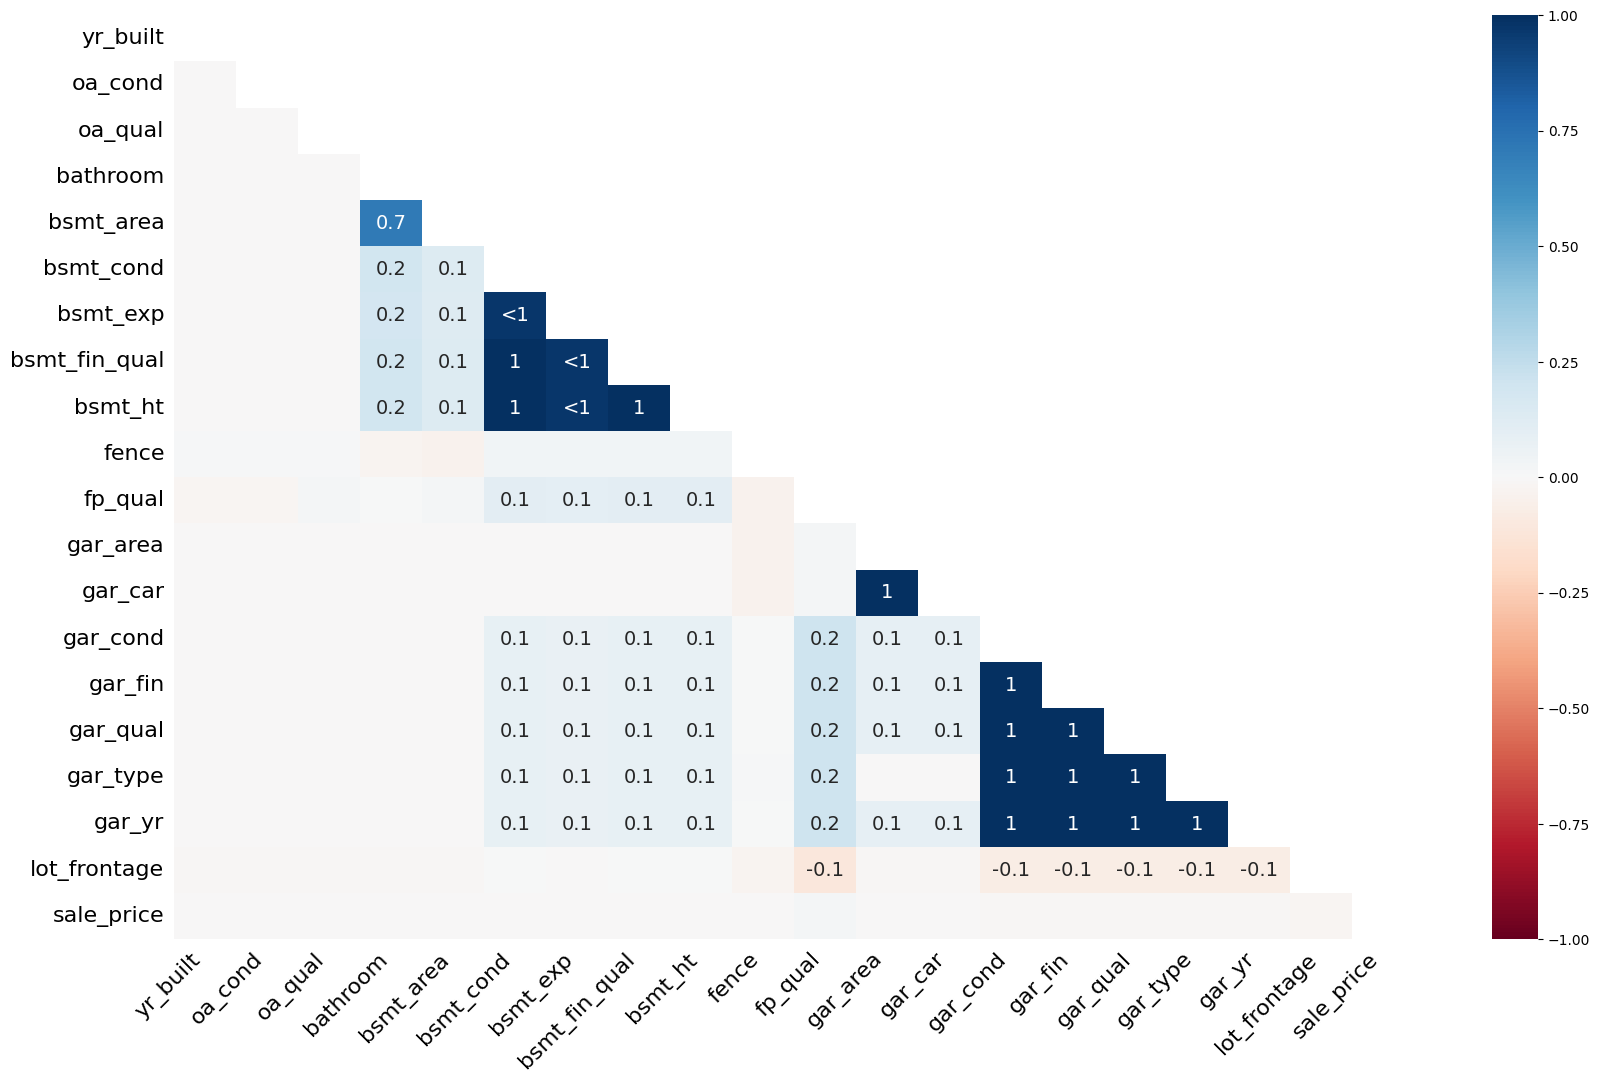

In [53]:
vis.na_plots(df)

2
Features with correlation==1:
yr_sold & yr_dt_sold
mo_sold & mo_dt_sold


### Unsupervised Learning

In [ ]:
# PCA, after imputation
# https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e
from sklearn.decomposition import PCA

